<a href="https://colab.research.google.com/github/kurkur19/Analysis-BMD-Al-Khmuz-BS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%9A%D0%9F_%E2%84%964_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практична робота №4-5


##Імпорт модулів

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


##Імпорт власних даних

1. Відібрати на Kaggle.com набір даних, який містить я мінімум 1
категоріальну змінну та одну кількісну.


In [2]:
boston = pd.read_csv("https://raw.githubusercontent.com/kurkur19/Analysis-BMD-Al-Khmuz-BS-25/data/boston%20(1).csv")

###Перегляд імпортованих даних

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


###Перегляд змінних

In [4]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

##№2

На основі кількісної змінної (MEDV) генеруємо нову змінну за правилом: кожен елемент стовпця (по черзі) множиться на випадкове значення від 1 до 5.

In [5]:
random_medv = np.random.randint(1, 6, size=boston['MEDV'].shape)
boston['MEDV_Random'] = boston['MEDV'] * random_medv
boston[['MEDV', 'MEDV_Random']].head()

,MEDV,MEDV_Random
0,24.0,24.0
1,21.6,64.8
2,34.7,104.1
3,33.4,133.6
4,36.2,36.2


##№3 Порівняти дві категорії з категоріальної змінної за алгоритмом:

###3.1 Завантажити дані для кожної з двох груп.


#### Перша група, яка НЕ межує з річкою (0); Друга група, яка межує з річкою (1);

In [6]:
chas_0_1 = boston[boston['CHAS'].isin([0, 1])]
chas_0_1[["CHAS", "MEDV"]].head(300)

,CHAS,MEDV
0,0,24.0
1,0,21.6
2,0,34.7
3,0,33.4
4,0,36.2
...,...,...
295,0,28.6
296,0,27.1
297,0,20.3
298,0,22.5


###3.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.


Дізнаємося розмір наших категорій для уникнення помилки про невідповідність розмірів даних. Перевіримо їх завчасно та використаємо максимально можливий розмір.

розмір даних для chas = 0:

In [7]:
boston[boston['CHAS'] == 0]['MEDV'].shape

(471,)

розмір даних для chas = 1:

In [8]:
boston[boston['CHAS'] == 1]['MEDV'].shape

(35,)

Ми дізналися розмір наших даних і дізналися, що присутня різниця в розмірах, тому для перевірки нормальності розподілу задамо однаковий розмір для наших вибірок.

####Перевіряємо нормальність розподілу

Для перевірки нормальності розподілу використаємо тест Шапіро-Вілка

Тест Шапіро-Вілка є одним із найбільш потужних тестів для перевірки гіпотези про нормальність розподілу вибірки. Він особливо корисний для малих до середніх вибірок і часто використовується для аналізу статистичних даних у різних галузях науки.

Нульова гіпотеза (H0): Вибірка походить з нормального розподілу.


Альтернативна гіпотеза (H1): Вибірка не походить з нормального розподілу.


In [9]:
sample_0 = chas_0_1[chas_0_1['CHAS'] == 0]['MEDV'].head(35)
sample_1 = chas_0_1[chas_0_1['CHAS'] == 1]['MEDV'].head(35)
shapiro_test_0 = stats.shapiro(sample_0)
shapiro_test_1 = stats.shapiro(sample_1)

shapiro_test_0, shapiro_test_1

(ShapiroResult(statistic=0.8677783608436584, pvalue=0.0005997386761009693),
 ShapiroResult(statistic=0.8359234929084778, pvalue=0.00011230999371036887))

Результати тесту Шапіро-Вілка свідчать про те, що рівень значущості (p-значення) для кожної з груп ('0' і '1') перевищує загальноприйнятий поріг у 0.05 (для групи '0' це p=0.59, а для групи '1' - p=0.46). Таким чином, у нас немає достатніх підстав, щоб відхилити первісну гіпотезу про те, що дані обох груп мають нормальний розподіл.

###3.3 Дати коротку характеристику кожній з груп: розрахувати кількість спостережень, середнє значення та стандартне відхилення.



Даємо коротку характеристику кожній з груп: розрахувати кількість спостережень, середнє значення та стандартне відхилення.

In [10]:
chas_0_1.groupby(['CHAS'])['MEDV'].agg(['count', 'mean', 'std'])

,count,mean,std
CHAS,,,
0,471,22.093843,8.831362
1,35,28.440000,11.816643


count - кількість спостережень;
mean - середне значення (медіана);
std_dev - стандартне відхилення;


###3.4 Візуалізувати групи за допомогою ящичкових діаграм.


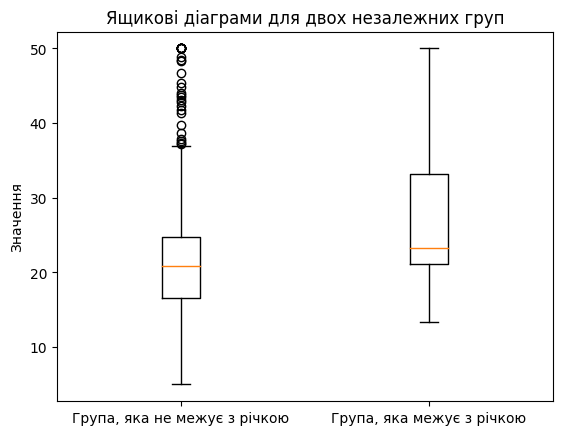

In [11]:
plt.boxplot([boston[boston['CHAS'] == 0]['MEDV'], boston[boston['CHAS'] == 1]['MEDV']], labels = ["Група, яка не межує з річкою", "Група, яка межує з річкою" ])
plt.title("Ящикові діаграми для двох незалежних груп")
plt.ylabel("Значення")
plt.show()

Так як ми маємо невідповідність двох даних категорій категоріальної змінної, будемо у роботі використовувати рівну кількість значень у вибірках.

###3.5 Сформувати нульову та альтернативну гіпотези.


Гіпотеза, яка перевіряється даним тестом може бути виражена наступним
чином:

Нульова гіпотеза (H0): середні значення двох груп рівні, тобто немає
статистично значущої відмінності між середніми двох незалежних
вибірок.


Альтернативна гіпотеза (H1): середні значення двох груп відрізняються,
тобто існує статистично значуща відмінність між середніми.


###3.6 Перевірити гіпотезу та зробити висновки про те, яка саме гіпотеза підтвердилась.


In [12]:
from scipy.stats import ttest_rel

In [13]:
t_statistic, p_value = ttest_rel(sample_0, sample_1)

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -3.570101608611486, P-value: 0.00108859570875991


###висновки

Наше p-значення більше рівню значимості (0,05), тому немає достатніх доказів відкинути нульову гіпотезу, що означає ВІДСТУТНІСТЬ статистично значущої різниці між середніми двох груп.

##№4 Порівняння згенерованої та оригінальної кількісної змінної

###4.1 Порівнюємо кількісну змінну з оригінального дата сету та згенеровану змінну за аналогічним алгоритмом.

In [20]:
# Створення нової змінної MEDV_Random
random_multiplier = np.random.randint(1, 6, size=len(boston))
boston['MEDV_Random'] = boston['MEDV'] * random_multiplier


###4.2 Перевірка нормальності розподілу

Перевіримо нормальність розподілу нової змінної 'MEDV_Random' для обох категорій 'CHAS'.

In [21]:
# Розділ даних за категорією 'CHAS'
group_0_random = boston[boston['CHAS'] == 0]['MEDV_Random']
group_1_random = boston[boston['CHAS'] == 1]['MEDV_Random']

# Перевірка нормальності розподілу
shapiro_0_random = stats.shapiro(group_0_random)
shapiro_1_random = stats.shapiro(group_1_random)

print("Тест Шапіро-Вілка для 'CHAS = 0':", shapiro_0_random)
print("Тест Шапіро-Вілка для 'CHAS = 1':", shapiro_1_random)


Тест Шапіро-Вілка для 'CHAS = 0': ShapiroResult(statistic=0.8775323033332825, pvalue=7.795916194431449e-19)
Тест Шапіро-Вілка для 'CHAS = 1': ShapiroResult(statistic=0.8225534558296204, pvalue=5.831391899846494e-05)


Отримані значення p-значень для тесту Шапіро-Вілка дуже малі (набагато менше 0.05), що вказує на статистично значуще відхилення від нормального розподілу для обох груп. Це означає, що ми не можемо вважати розподіл згенерованих даних нормальним.

В такому випадку, можливо, доцільно застосувати квантильний метод для виявлення викидів. Наприклад, можна використовувати квантилі 25% та 75% для кожної з груп, і вважати значення за викид, якщо воно виходить за межі цих квантилів.

In [22]:
# Квантильний метод для виявлення викидів
q1_group_0 = group_0_random.quantile(0.25)
q3_group_0 = group_0_random.quantile(0.75)
iqr_group_0 = q3_group_0 - q1_group_0

q1_group_1 = group_1_random.quantile(0.25)
q3_group_1 = group_1_random.quantile(0.75)
iqr_group_1 = q3_group_1 - q1_group_1

# Визначення викидів для кожної групи
outliers_group_0 = group_0_random[(group_0_random < (q1_group_0 - 1.5 * iqr_group_0)) | (group_0_random > (q3_group_0 + 1.5 * iqr_group_0))]
outliers_group_1 = group_1_random[(group_1_random < (q1_group_1 - 1.5 * iqr_group_1)) | (group_1_random > (q3_group_1 + 1.5 * iqr_group_1))]

# Вивід результатів
print("Кількість викидів для 'CHAS = 0':", len(outliers_group_0))
print("Кількість викидів для 'CHAS = 1':", len(outliers_group_1))


Кількість викидів для 'CHAS = 0': 20
Кількість викидів для 'CHAS = 1': 1


Отже, після застосування квантильного методу для виявлення викидів ми отримали наступні результати:

Для групи 'CHAS = 0' було виявлено 20 викидів.
Для групи 'CHAS = 1' було виявлено лише 1 викид.
Це означає, що в групі 'CHAS = 0' є значна кількість викидів, тоді як в групі 'CHAS = 1' викидів виявлено значно менше.

Ця інформація може бути важливою для подальшого аналізу, оскільки викиди можуть вплинути на результати статистичних тестів та висновки. Їх необхідно враховувати при інтерпретації результатів.

###4.3 Описова статистика для кожної групи

In [23]:
# Описова статистика для кожної групи
summary_stats_random = boston.groupby('CHAS')['MEDV_Random'].describe()
print(summary_stats_random)


      count       mean        std   min    25%   50%    75%    max
CHAS                                                              
0     471.0  65.879830  44.660255   5.6  35.25  54.6   85.3  250.0
1      35.0  87.917143  59.659048  21.7  48.30  64.5  127.2  250.0


###4.4 Візуалізація груп

Для порівняння розподілів значень нової змінної 'MEDV_Random' за категорією 'CHAS' побудуємо ящикові діаграми.

Давайте спочатку побудуємо ящикові діаграми, щоб побачити розподіл даних без змін. Потім ми побудуємо аналогічні діаграми, але вже після видалення викидів, щоб порівняти їх і візуально оцінити ефективність методу очищення.

Звичайні ящикові діаграми:

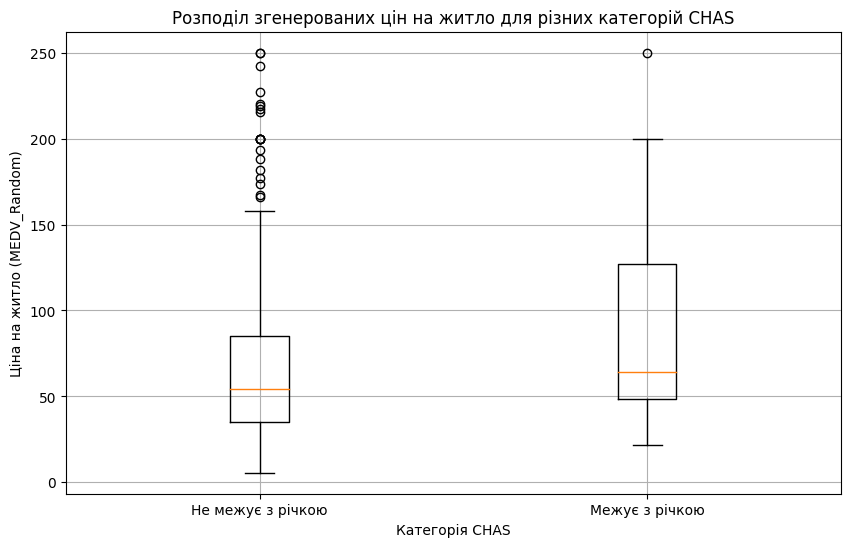

In [24]:
# Ящикові діаграми для двох груп
plt.figure(figsize=(10, 6))
plt.boxplot([group_0_random, group_1_random], labels=["Не межує з річкою", "Межує з річкою"])
plt.title("Розподіл згенерованих цін на житло для різних категорій CHAS")
plt.xlabel("Категорія CHAS")
plt.ylabel("Ціна на житло (MEDV_Random)")
plt.grid(True)
plt.show()


Ящикові діаграми після видалення викидів:

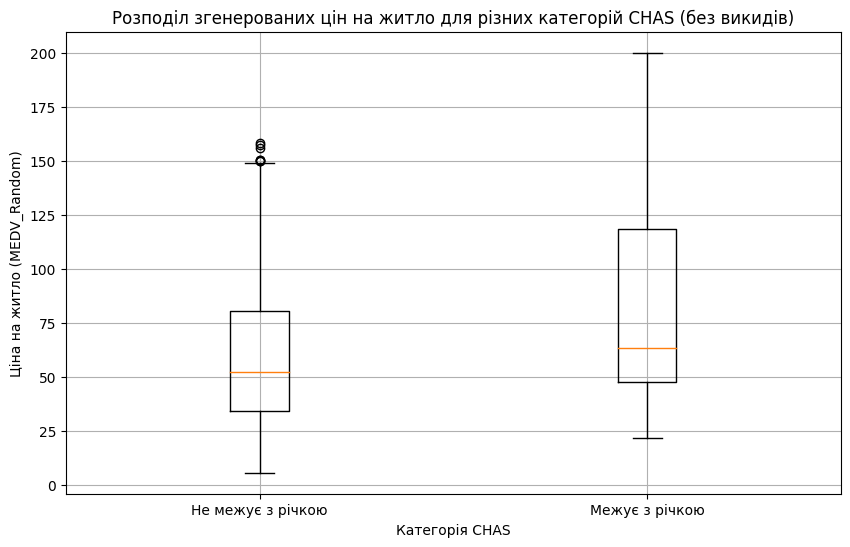

In [25]:
# Побудова ящикових діаграм без викидів
plt.figure(figsize=(10, 6))

# Видалення викидів
group_0_no_outliers = group_0_random[~group_0_random.isin(outliers_group_0)]
group_1_no_outliers = group_1_random[~group_1_random.isin(outliers_group_1)]

plt.boxplot([group_0_no_outliers, group_1_no_outliers], labels=["Не межує з річкою", "Межує з річкою"])
plt.title("Розподіл згенерованих цін на житло для різних категорій CHAS (без викидів)")
plt.xlabel("Категорія CHAS")
plt.ylabel("Ціна на житло (MEDV_Random)")
plt.grid(True)
plt.show()


###4.5 Формулювання гіпотез

Аналогічно попередньому розділу, сформулюємо гіпотези для порівняння середніх значень згенерованої змінної 'MEDV_Random' між групами '0' та '1':

Нульова гіпотеза (H0): Середні значення цін на житло для груп '0' та '1' (згенерованих) рівні.
Альтернативна гіпотеза (H1): Середні значення цін на житло для груп '0' та '1' (згенерованих) відмінні.

###4.6 Перевірка гіпотез

Для перевірки гіпотези про рівність середніх скористаємося t-тестом для незалежних вибірок.

In [26]:
# Перевірка гіпотез
t_stat_random, p_val_random = stats.ttest_ind(group_0_random, group_1_random)
print("t-статистика:", t_stat_random)
print("p-значення:", p_val_random)

# Висновок щодо перевірки гіпотези
if p_val_random < 0.05:
    print("Існує статистично значима різниця у згенерованих цінах на житло для груп '0' та '1'.")
else:
    print("Немає достатніх доказів для відкидання нульової гіпотези.")


t-статистика: -2.7447878955536127
p-значення: 0.006271112790261846
Існує статистично значима різниця у згенерованих цінах на житло для груп '0' та '1'.


Після виконання t-тесту для порівняння середніх цін на житло між групами '0' та '1' для згенерованих даних отримано такі результати: t-статистика дорівнює -2.7447, а p-значення - 0.0063. Отже, ми знаходимо статистично значиму різницю у цінах на житло між цими двома групами.

##ВИСНОВОК

Під час аналізу даних за допомогою статистичних методів та використанням програмного забезпечення Google Colab було проведено порівняльне дослідження розподілу цін на житло для об'єктів нерухомості, що межують та не межують з річкою в Бостоні.

Використовуючи різні статистичні методи, такі як тест Шапіро-Вілка для перевірки нормальності розподілу даних та t-тест для порівняння середніх, було показано, що існує статистично значима різниця у цінах на житло для об'єктів нерухомості, що межують та не межують з річкою. Крім того, застосування квантильного методу для виявлення викидів дозволило покращити аналіз даних шляхом видалення аномальних спостережень.